In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 


In [20]:
IMAGE_SIZE=256
IMAGE_BATCH=32
EPCOHS=50
CHANNELS=3

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=IMAGE_BATCH
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 2 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0]


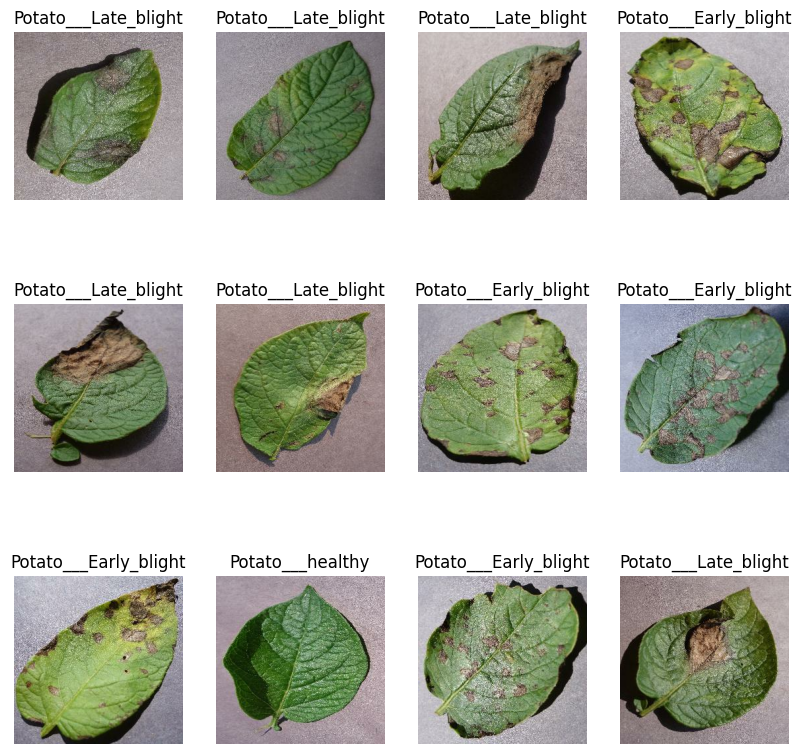

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')
#    print(image_batch[0].numpy())  

In [8]:
def get_data_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,Shuffle_size=10000):
     ds_size=len(ds)
     
     if shuffle:
         ds=ds.shuffle(Shuffle_size,seed=42)
     train_size=int(train_split*ds_size)
     val_size= int(val_split*ds_size)
     
     train_ds=ds.take(train_size)
     val_ds=ds.skip(train_size).take(val_size)
     test_ds=ds.skip(train_size).skip(val_size)
     return train_ds,test_ds,val_ds

In [9]:
train_ds,test_ds,val_ds=get_data_partitions_tf(dataset)

In [10]:
len(train_ds)

54

In [11]:
len(test_ds)

8

In [12]:
len(val_ds)

6

In [13]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (IMAGE_BATCH, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPCOHS,
    batch_size=IMAGE_BATCH,
    verbose=1,
    validation_data=val_ds 
)

Epoch 1/50
54/54 [==============================] - 95s 2s/step - loss: 0.9057 - accuracy: 0.4847 - val_loss: 0.8509 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 75s 1s/step - loss: 0.7144 - accuracy: 0.6620 - val_loss: 0.5061 - val_accuracy: 0.7917
Epoch 3/50
54/54 [==============================] - 70s 1s/step - loss: 0.4071 - accuracy: 0.8286 - val_loss: 0.3510 - val_accuracy: 0.8385
Epoch 4/50
54/54 [==============================] - 77s 1s/step - loss: 0.2846 - accuracy: 0.8819 - val_loss: 0.2505 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 66s 1s/step - loss: 0.2391 - accuracy: 0.9034 - val_loss: 0.1794 - val_accuracy: 0.9219
Epoch 6/50
54/54 [==============================] - 72s 1s/step - loss: 0.1910 - accuracy: 0.9255 - val_loss: 0.1639 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 66s 1s/step - loss: 0.1518 - accuracy: 0.9363 - val_loss: 0.1303 - val_accuracy: 0.9427
Epoch 8/50
54/54 [==

In [25]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 255ms/step - loss: 1.6784e-04 - accuracy: 1.0000


In [26]:
scores

[0.0001678375992923975, 1.0]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
len(history.history['accuracy'])

50

In [31]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

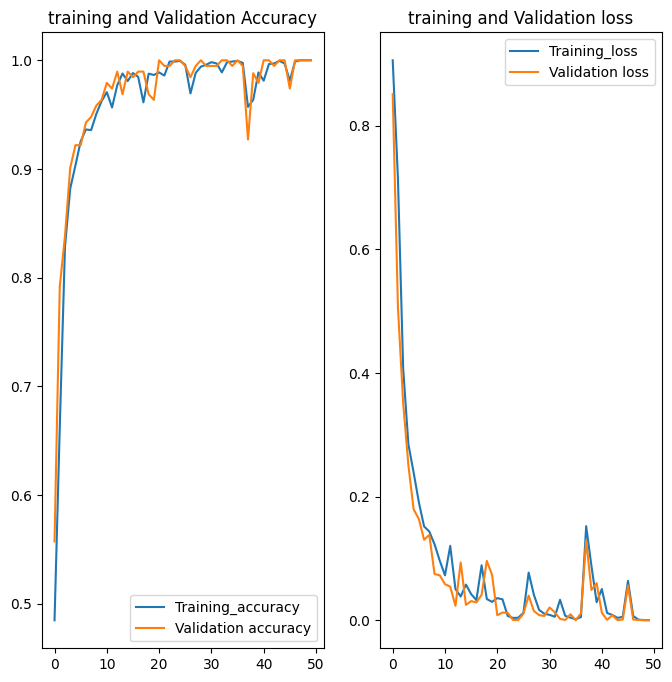

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPCOHS),acc,label='Training_accuracy')
plt.plot(range(EPCOHS),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPCOHS),loss,label='Training_loss')
plt.plot(range(EPCOHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('training and Validation loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 983ms/step
predicted label: Potato___Late_blight


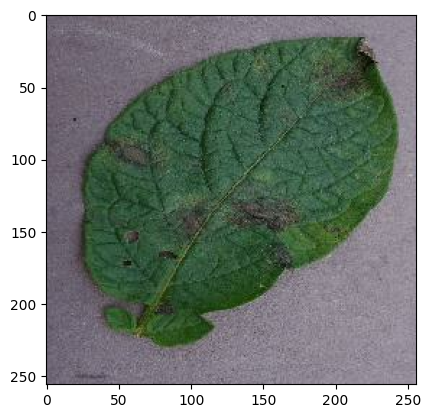

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, image):
    # Convert the image to an array and expand dimensions to create a batch
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)  # Create batch

    # Predict on the batch of images
    predictions = model.predict(image_array)
    
    # Get the predicted class and confidence
    prediction_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)  # Fix confidence calculation

    return prediction_class, confidence


1/1 [==============================] - 0s 30ms/step


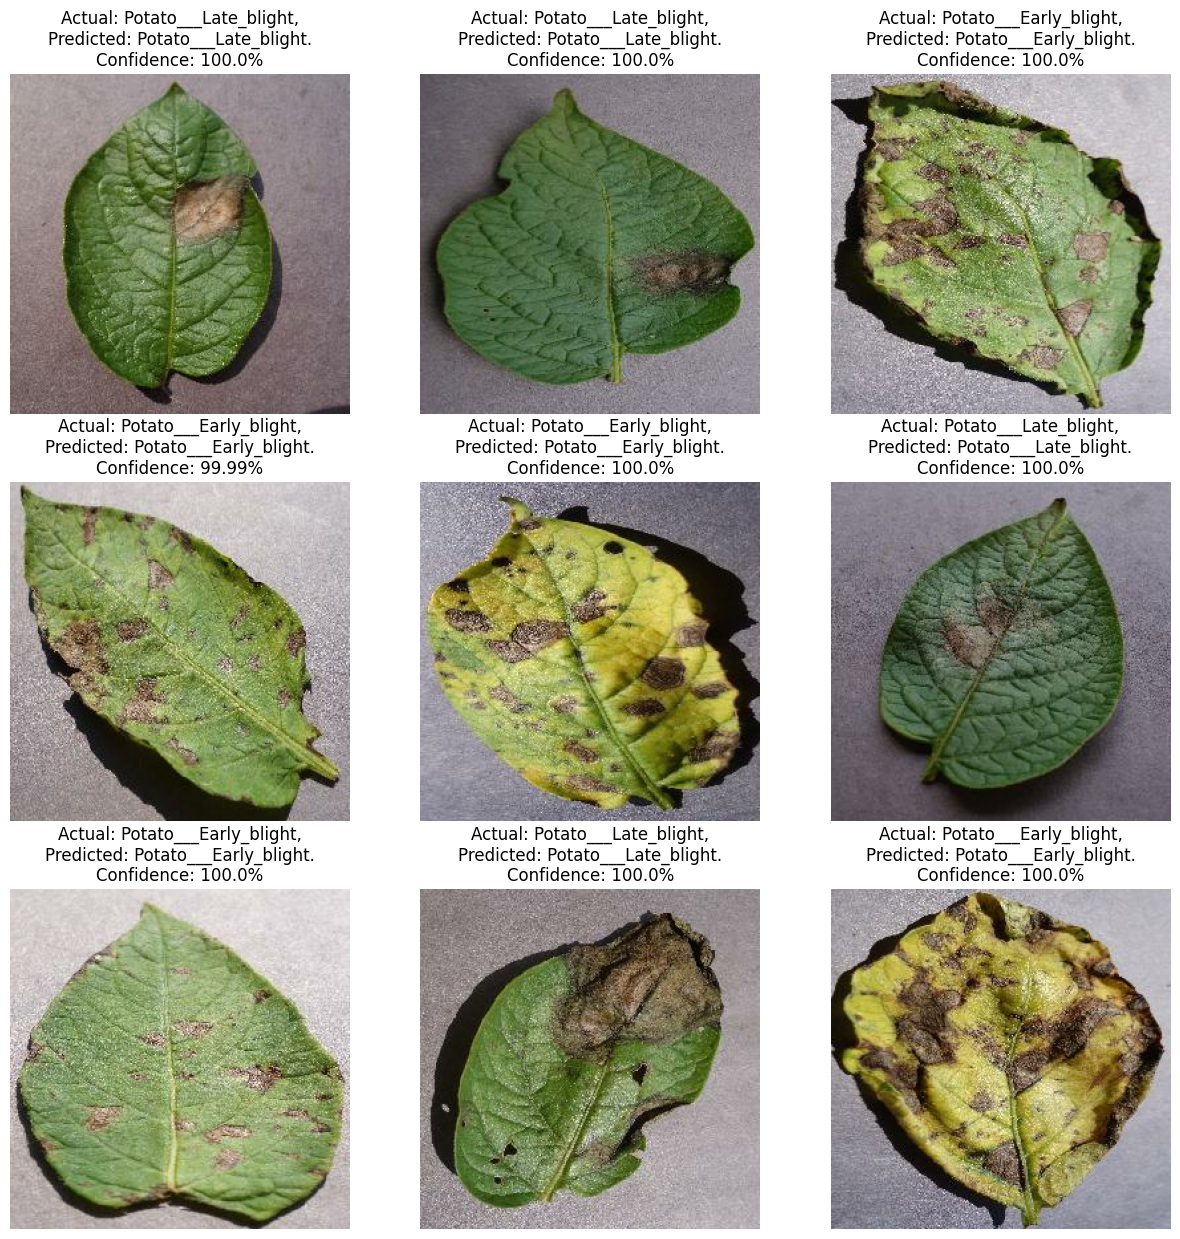

In [40]:

# Plotting the images and predictions
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        # Pass the image through the predict function
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]        
        
        # Display the actual, predicted class and confidence
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%")
        plt.axis('off')


In [59]:
import os

# Automatically get the directory of the current script (your project directory)
project_dir = os.getcwd()

# Create the models directory inside your project folder
models_dir = os.path.join(project_dir, "models")
os.makedirs(models_dir, exist_ok=True)

# Determine the version of the model
model_version = max([int(i) for i in os.listdir(models_dir) + [0]]) + 1

# Save the model to the 'models' directory inside your project folder
model.save(os.path.join(models_dir, str(model_version)))

print(f"Model saved to: {os.path.join(models_dir, str(model_version))}")


INFO:tensorflow:Assets written to: c:\Users\shelk\OneDrive\Desktop\potato_diesase\models\3\assets


INFO:tensorflow:Assets written to: c:\Users\shelk\OneDrive\Desktop\potato_diesase\models\3\assets


Model saved to: c:\Users\shelk\OneDrive\Desktop\potato_diesase\models\3


In [58]:
import os

# Get the current working directory
project_dir = os.getcwd()

# Save the model directly in the current working directory as 'potatoes.h5'
model.save(os.path.join(project_dir, "potatoes.h5"))

print(f"Model saved to: {os.path.join(project_dir, 'potatoes.h5')}")

Model saved to: c:\Users\shelk\OneDrive\Desktop\potato_diesase\potatoes.h5


c:\Users\shelk\OneDrive\Desktop\potato_diesase\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
